In [1]:
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Mount dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Data Preprocessing


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Dataset',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/Dataset',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 940 images belonging to 12 classes.
Found 234 images belonging to 12 classes.


# Training

In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.15),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.15),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    Dropout(0.15),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.15),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'] )

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model8_custom_cnn.keras', monitor='val_loss', save_best_only=True, save_weights_only=False)

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=150,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[checkpoint, early_stopping]
)

model.save('mon_modele_custom_cnn8.keras')

Epoch 1/150
94/94 [==============================] - 440s 5s/step - loss: 2.4631 - accuracy: 0.1351 - val_loss: 2.2891 - val_accuracy: 0.1667
Epoch 2/150
94/94 [==============================] - 25s 269ms/step - loss: 2.2003 - accuracy: 0.2277 - val_loss: 2.1584 - val_accuracy: 0.2650
Epoch 3/150
94/94 [==============================] - 25s 268ms/step - loss: 1.9538 - accuracy: 0.3447 - val_loss: 1.9866 - val_accuracy: 0.3376
Epoch 4/150
94/94 [==============================] - 24s 253ms/step - loss: 1.8831 - accuracy: 0.3745 - val_loss: 1.8761 - val_accuracy: 0.3504
Epoch 5/150
94/94 [==============================] - 24s 250ms/step - loss: 1.7378 - accuracy: 0.4064 - val_loss: 1.8462 - val_accuracy: 0.4188
Epoch 6/150
94/94 [==============================] - 25s 264ms/step - loss: 1.6640 - accuracy: 0.4362 - val_loss: 1.7584 - val_accuracy: 0.4145
Epoch 7/150
94/94 [==============================] - 23s 240ms/step - loss: 1.6730 - accuracy: 0.4160 - val_loss: 1.7805 - val_accuracy: 0

# Evaluate

24/24 [==============================] - 6s 229ms/step
Matrice de confusion :
[[ 4  0  1  0  0  2  2  0  0  4  0  1]
 [ 0 13  0  0  0  2  0  0  2  2  0  1]
 [ 0  0 11  2  0  2  3  1  0  0  1  0]
 [ 0  1  0 10  1  1  0  2  0  2  2  1]
 [ 0  0  2  2  9  0  0  1  1  1  1  3]
 [ 1  0  0  0  1  9  0  0  1  5  3  0]
 [ 1  0  0  0  0  1 10  0  0  0  6  2]
 [ 0  0  0  3  1  2  0  7  0  3  2  2]
 [ 0  0  0  0  0  1  1  0 14  3  0  1]
 [ 0  0  0  0  1  2  0  0  0 16  0  1]
 [ 0  0  0  0  0  0  0  0  0  2 16  2]
 [ 1  1  0  0  0  0  1  0  4  2  2  9]]
Rapport de classification :
                       precision    recall  f1-score   support

      10CelestialLady       0.57      0.29      0.38        14
11ReunificationPalace       0.87      0.65      0.74        20
        12TheNoonGate       0.79      0.55      0.65        20
            1AsiaPark       0.59      0.50      0.54        20
        2DragonBridge       0.69      0.45      0.55        20
        3GoldenBridge       0.41      0.45    

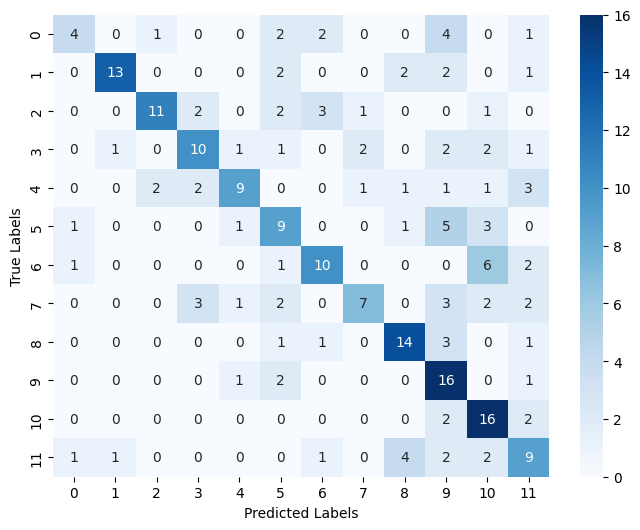

In [5]:
validation_generator.reset()
Y_pred = model.predict(validation_generator, steps=len(validation_generator))
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

print("Rapport de classification :")
print(classification_report(y_true, y_pred, target_names=train_generator.class_indices.keys()))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


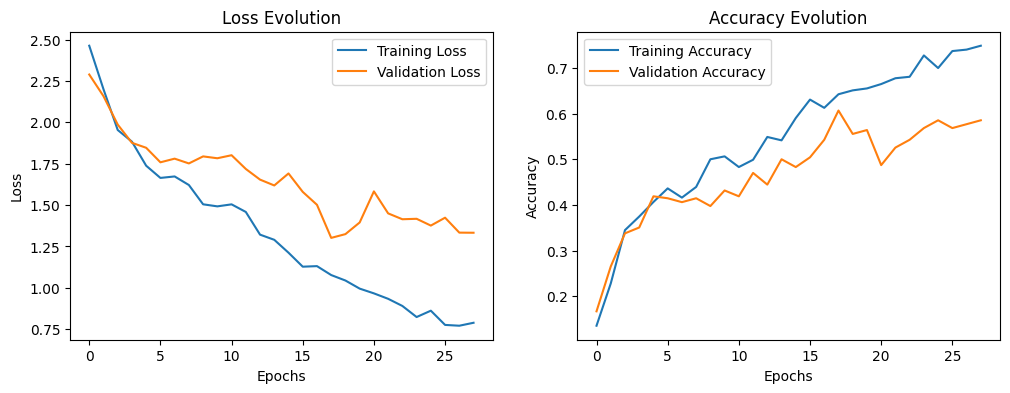

In [6]:
# Plot the training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Print HeatMap

In [10]:
import os
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def get_random_image_from_dir(base_dir):
    folders = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    random_folder = random.choice(folders)
    images = [os.path.join(random_folder, f) for f in os.listdir(random_folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    random_image = random.choice(images)
    return random_image

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

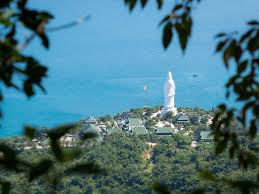

In [26]:
model.summary()

model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_bn"

# The local path to our target image
img_path = keras.utils.get_file(
   "/content/drive/MyDrive/Dataset/7LadyBuddha/images (5).jpg","/content/drive/MyDrive/Dataset/7LadyBuddha/images (5).jpg"
)

display(Image(img_path))




1/1 [==============================] - 1s 1s/step
Predicted: [('n03837869', 'obelisk', 5.844861)]


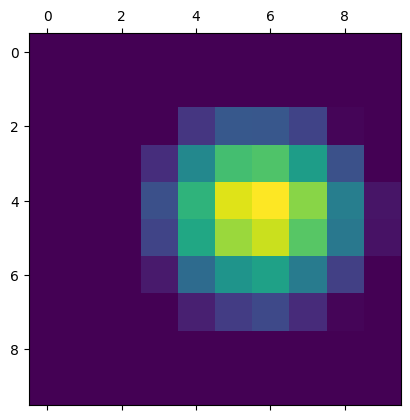

In [27]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()


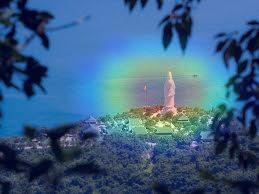

In [28]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)


# Print convolution layers

In [29]:
# Visualize the filters of all convolutional layers
for layer in model.layers:
    if 'conv' in layer.name:
        filters, biases = layer.get_weights()
        print(f"Layer {layer.name} has filters with shape: {filters.shape}")

        n_filters = filters.shape[-1]
        n_columns = 8
        n_rows = n_filters // n_columns

        plt.figure(figsize=(20, 10))
        for i in range(n_filters):
            f = filters[:, :, :, i]
            f_min, f_max = f.min(), f.max()
            f = (f - f_min) / (f_max - f_min)
            plt.subplot(n_rows, n_columns, i + 1)
            plt.imshow(f[:, :, 0], cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Filters of layer {layer.name}')
        plt.show()

ValueError: not enough values to unpack (expected 2, got 1)

Randomly selected image path: /content/drive/MyDrive/Dataset/9TurtleTower/turtle-tower-2_1668011732.jpg


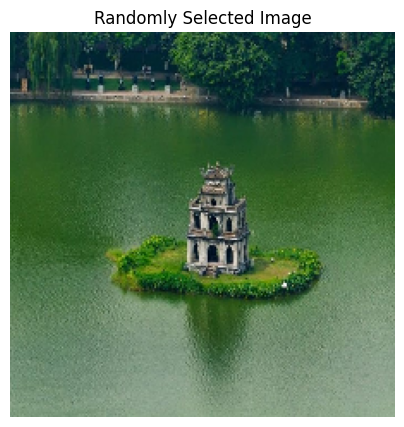

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 224, 224, 3)


In [30]:
# Function to randomly select an image from a directory
def get_random_image_from_dir(base_dir):
    folders = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    random_folder = random.choice(folders)
    images = [os.path.join(random_folder, f) for f in os.listdir(random_folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    random_image = random.choice(images)
    return random_image

# Function to visualize feature maps
def visualize_feature_maps(model, img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.imshow(image.array_to_img(img_tensor[0]))
    plt.title("Randomly Selected Image")
    plt.axis('off')
    plt.show()

    layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    layer_names = [layer.name for layer in model.layers if 'conv' in layer.name or 'pool' in layer.name]

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]

        n_columns = 8
        n_rows = n_features // n_columns

        plt.figure(figsize=(20, n_rows * 2))
        for i in range(n_features):
            plt.subplot(n_rows, n_columns, i + 1)
            plt.imshow(layer_activation[0, :, :, i], aspect='auto', cmap='viridis')
            plt.axis('off')
        plt.suptitle(f'Feature maps of layer {layer_name}')
        plt.show()

# Provide the base directory where the images are stored
base_dir = '/content/drive/MyDrive/Dataset'  # Change this to your base directory
img_path = get_random_image_from_dir(base_dir)
print(f"Randomly selected image path: {img_path}")
visualize_feature_maps(model, img_path)